In [115]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [116]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [117]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [118]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# create a StandardScaler instance
scaler = StandardScaler()
# fit the StandardScaler
scaler.fit(market_data_df)
# scale/transform the data
scaled_data = scaler.transform(market_data_df)
display(scaled_data.shape)
display(scaled_data)

(41, 7)

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [119]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
transformed_scaled_data["coin_id"] = market_data_df.index
crypto_names = transformed_scaled_data['coin_id'].to_frame()

# Set the coinid column as index
transformed_scaled_data.set_index("coin_id", inplace=True)

# Display sample data
display(crypto_names.head(10))
display(transformed_scaled_data.head(10))


,coin_id
0,bitcoin
1,ethereum
2,tether
3,ripple
4,bitcoin-cash
5,binancecoin
6,chainlink
7,cardano
8,litecoin
9,bitcoin-cash-sv


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [120]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
import warnings
warnings.filterwarnings("ignore")
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(transformed_scaled_data)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data) 

# Display the DataFrame
df_elbow.head(10)


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


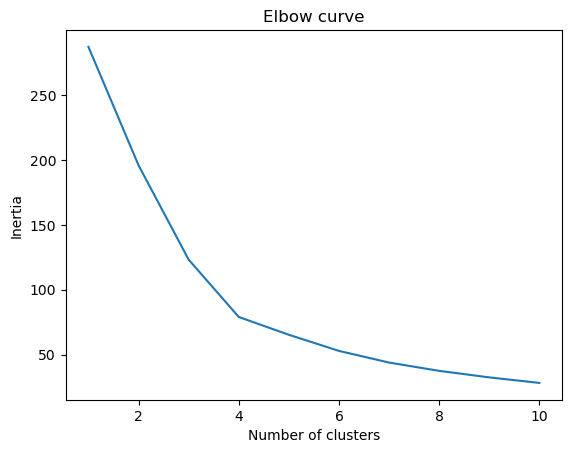

In [121]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Best Value for 'k' is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [122]:
# Initialize the K-Means model using the best value for k
# Use the best value of k from the Elbow curve
model = KMeans(n_clusters=4, random_state=0)

In [123]:
# Fit the K-Means model using the scaled data
model.fit(transformed_scaled_data)

KMeans(n_clusters=4, random_state=0)

In [124]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(transformed_scaled_data)

# View the resulting array of cluster value.
crypto_clusters

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [125]:
# Create a copy of the DataFrame
clustered_df = transformed_scaled_data.copy()


In [126]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = model.labels_

# Display sample data
clustered_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

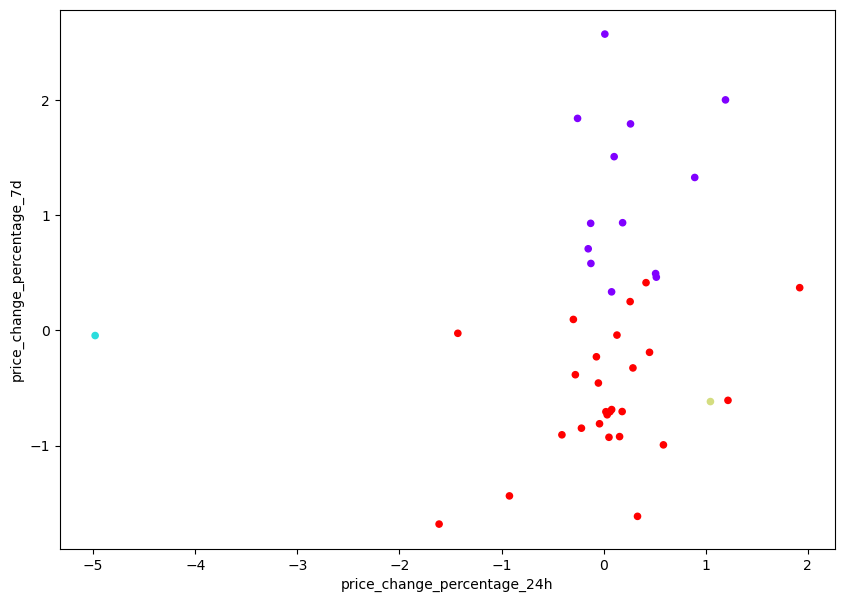

In [127]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", colormap="rainbow", figsize=(10, 7), colorbar=False)


### Optimize Clusters with Principal Component Analysis.

In [128]:
# Create a PCA model instance and set `n_components=3`
# Use the `PCA()` module from scikit-learn to create a PCA model
pca = PCA(n_components=3)


In [129]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
# Fit the PCA model to the scaled data
crypto_pca = pca.fit_transform(transformed_scaled_data)

# View the first five rows of the DataFrame.
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [130]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
# Use the `explained_variance_ratio_` attribute to calculate the explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance : {explained_variance}")

# What is the total explained variance from the three principal components?
print(f"Total Explained Variance : {explained_variance.sum()}")

Explained Variance : [0.3719856  0.34700813 0.17603793]
Total Explained Variance : 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .895

In [131]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    crypto_pca, columns=["PCA1", "PCA2", "PCA3"], index=crypto_names.index
)

# Copy the crypto names from the original data
pca_df["coin_id"] = crypto_names["coin_id"]

# Set the coinid column as index
pca_df.set_index("coin_id", inplace=True)

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [132]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

import warnings
warnings.filterwarnings("ignore")
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(transformed_scaled_data)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data) 

# Display the DataFrame
df_elbow.head(10)


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


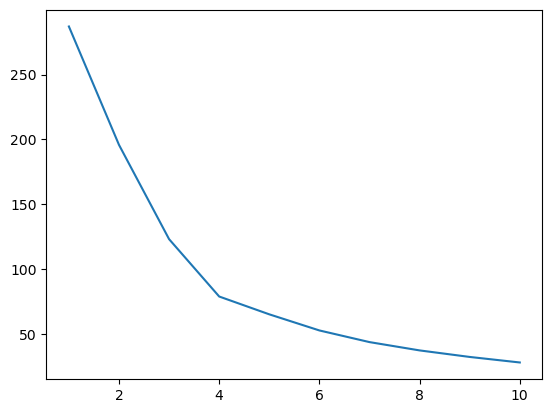

In [133]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(df_elbow['k'], df_elbow['inertia'])


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, in this case, the best value for `k` is the same as the best value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [134]:
# Initialize the K-Means model using the best value for k  
# Use the best value of k from the Elbow curve
model = KMeans(n_clusters=4, random_state=0)

In [135]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)


KMeans(n_clusters=4, random_state=0)

In [136]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model.predict(pca_df)

# Print the resulting array of cluster values.
crypto_clusters_pca

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [137]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy["crypto_cluster"] = model.labels_

# Display sample data
pca_df_copy.head(10)

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [138]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
# Use "crypto_cluster" for the color to better visualize the data.
import hvplot.pandas
pca_df_copy.hvplot.scatter(x="PCA1", y="PCA2", by="crypto_cluster", hover_cols=["coin_id"])

:NdOverlay   [crypto_cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [139]:
# Use the columns from the original scaled DataFrame as the index for the PCA DataFrame
display(pca_df_copy.head(10))

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA1
   

In [140]:
loadings = pca.components_
# Assuming 'columns' is the list of variable names in your pca_df DataFrame
loadings_df = pd.DataFrame(loadings.T, columns=pca_df.columns)

# Sort loadings by absolute values of PCA components
sorted_loadings = loadings_df.abs().sort_values(by='PCA3', ascending=False)
display(sorted_loadings.head(10))


,PCA1,PCA2,PCA3
1,0.102432,0.227432,0.787670
4,0.320365,0.434040,0.361377
2,0.009162,0.540415,0.349534
0,0.416728,0.358162,0.218795
6,0.568379,0.150789,0.210541
3,0.191523,0.562182,0.181744
5,0.594468,0.027735,0.039733
